In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from SGM import *
import math

if not os.path.exists('result'):
    os.makedirs('result')

# 1. The first example

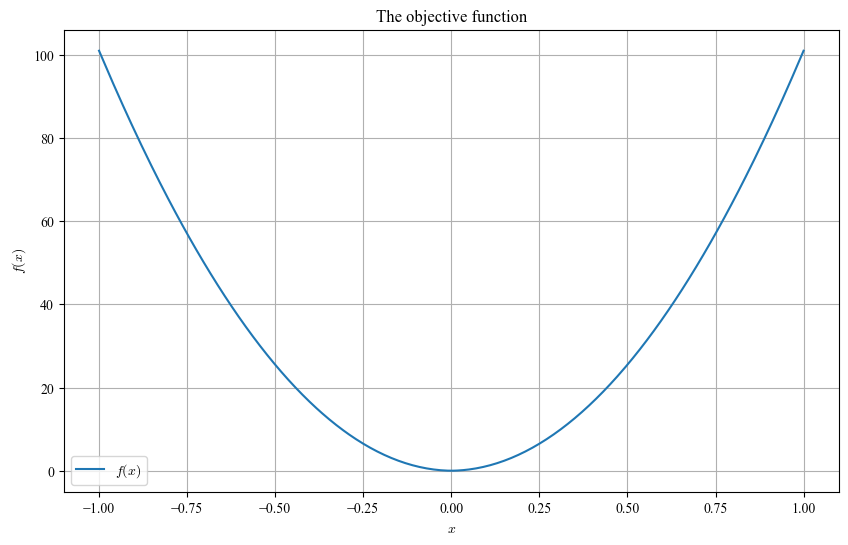

In [2]:
x_start = -1.0
x_end = 1.0
gamma = 0.005
eta = 1e-6
h = 1e-6

# Objective Function
def f(x):
    return np.sum([np.abs(x - i/100) + np.abs(x + i/100) - 2*i/100 for i in range(99)])

X = np.linspace(x_start, x_end, 500)        # Generate X values
Y = np.array([f(i) for i in X])             # Generate Y values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$f(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

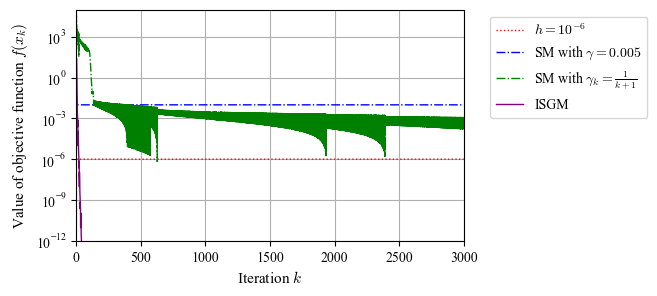

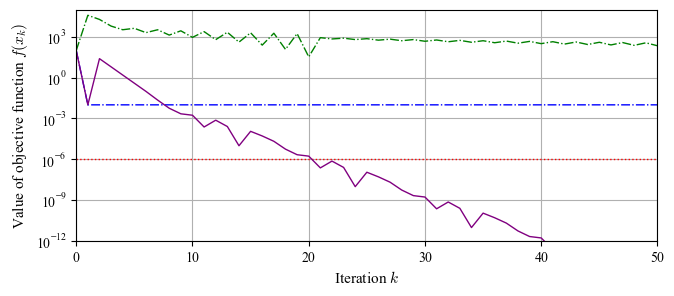

In [3]:
result, x_0, filename1 = VISUALIZATION(objective_function=f, x_start=x_start, x_end=x_end, x_0=0.995, gamma=gamma, eta=eta, N=3001, h=h, filename='result/first_example', range_of_y=(1e-12, 1e+5), functionname='f')

result_zoomed, x_0, filename2 = VISUALIZATION(objective_function=f, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/first_example_zoomed', range_of_y=(1e-12, 1e+5), legend=False, functionname='f')

image1_path = filename1
image2_path = filename2
output_path = f'result/first_example_combined with initial point {x_0}.png'

combine_images_vertically(image1_path, image2_path, output_path)


In [4]:
average = AVERAGE(objective_function=f, x_start=x_start, x_end=x_end, gamma=gamma, eta=eta, h=h, N=21, test_points=20)
average

,SM constant,SM diminishing,ISGM
0,28.678332,28.678332,28.678332
1,18639.615588,18639.615588,34.631810
2,8462.878856,8462.878856,6.373259
3,5508.011998,5508.011998,1.595880
4,3718.703861,3718.703861,0.618080
5,3327.744093,3327.744093,0.170138
6,3118.443641,3118.443641,0.042517
7,2287.948797,2287.948797,0.013449
8,2213.862581,2213.862581,0.008677
9,1854.892430,1854.892430,0.004241


In [5]:
# Convert DataFrame to LaTeX format
latex_code = average[:21].to_latex(float_format="{:.8f}".format)
print(latex_code)

\begin{tabular}{lrrr}
\toprule
 & SM constant & SM diminishing & ISGM \\
\midrule
0 & 28.67833231 & 28.67833231 & 28.67833231 \\
1 & 18639.61558768 & 18639.61558768 & 34.63181047 \\
2 & 8462.87885632 & 8462.87885632 & 6.37325900 \\
3 & 5508.01199788 & 5508.01199788 & 1.59588048 \\
4 & 3718.70386133 & 3718.70386133 & 0.61807951 \\
5 & 3327.74409250 & 3327.74409250 & 0.17013832 \\
6 & 3118.44364099 & 3118.44364099 & 0.04251742 \\
7 & 2287.94879713 & 2287.94879713 & 0.01344928 \\
8 & 2213.86258136 & 2213.86258136 & 0.00867697 \\
9 & 1854.89242981 & 1854.89242981 & 0.00424097 \\
10 & 1529.09569240 & 1529.09569240 & 0.00199183 \\
11 & 1840.45039670 & 1840.45039670 & 0.00100914 \\
12 & 1136.03050948 & 1136.03050948 & 0.00048382 \\
13 & 1223.15494302 & 1223.15494302 & 0.00028012 \\
14 & 1294.68042942 & 1294.68042942 & 0.00009884 \\
15 & 1006.70618462 & 1006.70618462 & 0.00007050 \\
16 & 1217.67625509 & 1217.67625509 & 0.00003191 \\
17 & 885.97613715 & 885.97613715 & 0.00001674 \\
18 & 953.387

# 2. The second example

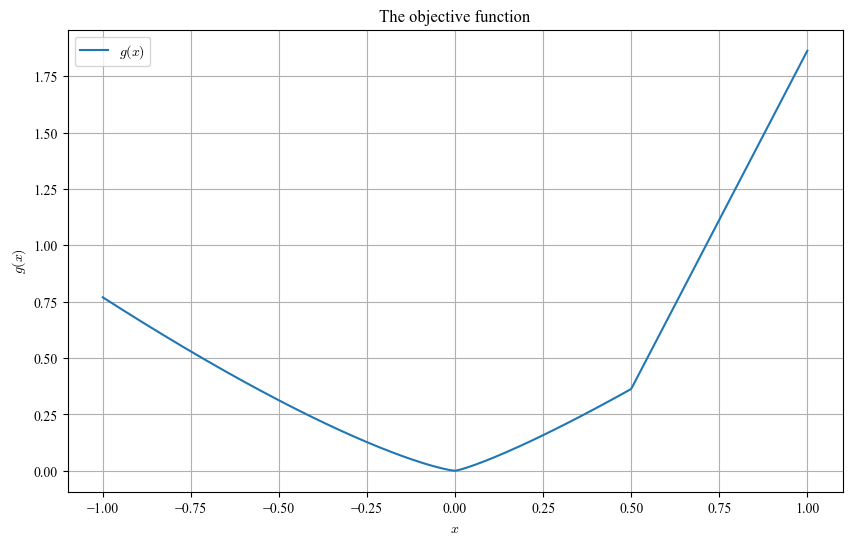

In [6]:
x_start = -1.0
x_end = 1.0
gamma = 0.005
eta = 1e-6
h = 1e-6
p = 1.3
q = 1.2

# Objective Function
def g(x):
    if x >= 0.5:
        return 3*(x - 0.5) + (0.5**q)/q
    elif 0 <= x < 0.5:
        return (np.abs(x)**q)/q
    else:
        return (np.abs(x)**p)/p


# Generate X values
X = np.linspace(-1, 1, 500)

# Generate Y values
Y = np.array([g(i) for i in X])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$g(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.legend()
plt.grid(True)
plt.show()

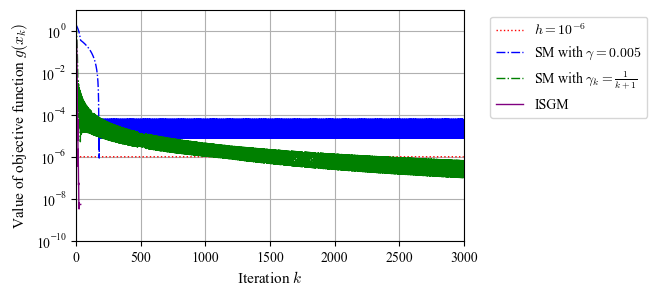

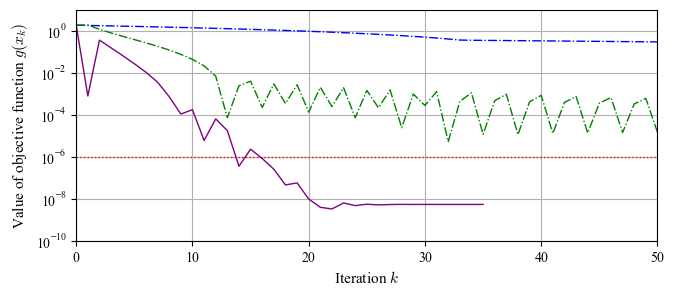

In [7]:
result, x_0, filename1 = VISUALIZATION(objective_function=g, x_start=x_start, x_end=x_end, x_0=0.995, gamma=gamma, eta=eta, N=3001, h=h, filename='result/second_example', functionname='g')

result_zoomed, x_0, filename2 = VISUALIZATION(objective_function=g, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/second_example_zoomed', legend=False, functionname='g')

image1_path = filename1
image2_path = filename2
output_path = f'result/second_example_combined with initial point {x_0}.png'

combine_images_vertically(image1_path, image2_path, output_path)

In [8]:
average = AVERAGE(objective_function=g, x_start=x_start, x_end=x_end, gamma=gamma, eta=eta, h=h, N=21, test_points=20)
average

,SM constant,SM diminishing,ISGM
0,0.414710,0.414710,4.147104e-01
1,0.626917,0.626917,5.681093e-01
2,0.317021,0.317021,1.742519e-01
3,0.222882,0.222882,6.341802e-02
4,0.168825,0.168825,1.271457e-02
5,0.114101,0.114101,1.307587e-02
6,0.094447,0.094447,4.417446e-03
7,0.063048,0.063048,1.472282e-03
8,0.052796,0.052796,7.748016e-04
9,0.034775,0.034775,3.221264e-04


In [9]:
# Convert DataFrame to LaTeX format
latex_code = average[:21].to_latex(float_format="{:.8f}".format)
print(latex_code)

\begin{tabular}{lrrr}
\toprule
 & SM constant & SM diminishing & ISGM \\
\midrule
0 & 0.41471035 & 0.41471035 & 0.41471035 \\
1 & 0.62691660 & 0.62691660 & 0.56810933 \\
2 & 0.31702132 & 0.31702132 & 0.17425186 \\
3 & 0.22288196 & 0.22288196 & 0.06341802 \\
4 & 0.16882523 & 0.16882523 & 0.01271457 \\
5 & 0.11410096 & 0.11410096 & 0.01307587 \\
6 & 0.09444716 & 0.09444716 & 0.00441745 \\
7 & 0.06304788 & 0.06304788 & 0.00147228 \\
8 & 0.05279644 & 0.05279644 & 0.00077480 \\
9 & 0.03477451 & 0.03477451 & 0.00032213 \\
10 & 0.02933899 & 0.02933899 & 0.00012387 \\
11 & 0.01769512 & 0.01769512 & 0.00006077 \\
12 & 0.01505747 & 0.01505747 & 0.00003058 \\
13 & 0.00792024 & 0.00792024 & 0.00001349 \\
14 & 0.00735699 & 0.00735699 & 0.00000477 \\
15 & 0.00339515 & 0.00339515 & 0.00000194 \\
16 & 0.00395441 & 0.00395441 & 0.00000113 \\
17 & 0.00120779 & 0.00120779 & 0.00000043 \\
18 & 0.00228917 & 0.00228917 & 0.00000015 \\
19 & 0.00071315 & 0.00071315 & 0.00000005 \\
20 & 0.00192277 & 0.00192277

# 3. The third example

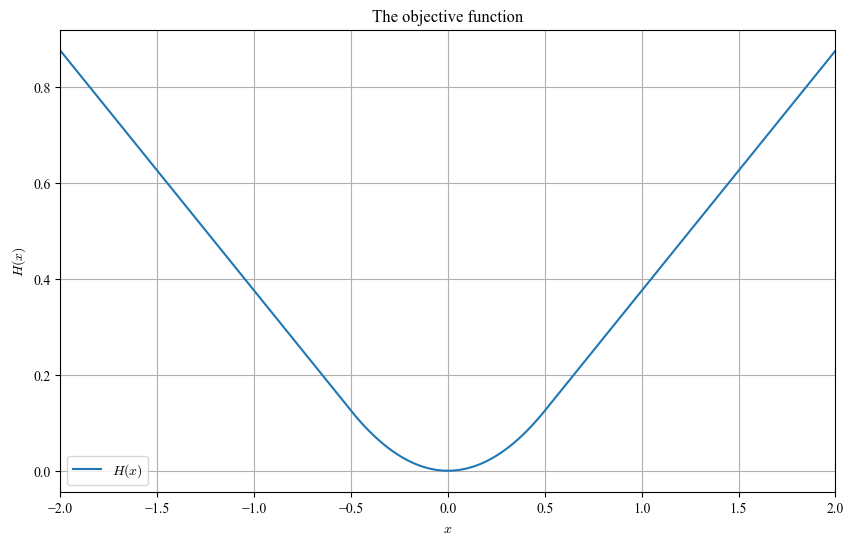

In [10]:
delta = 0.5
x_start = -2.0
x_end = 2.0
gamma = 0.005
eta = 1e-6
h = 1e-6

# Objective Function
def H(x, delta=0.5):
    if abs(x) <= delta:
        return (x**2)/2
    else:
        return delta*(abs(x) - delta/2)

# Generate X values
X = np.linspace(-2, 2, 500)

# Generate Y values
Y = np.array([H(i, delta=delta) for i in X]) 

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$H(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$H(x)$')
plt.legend()
plt.xlim(min(X), max(X))
plt.grid(True)
plt.show()

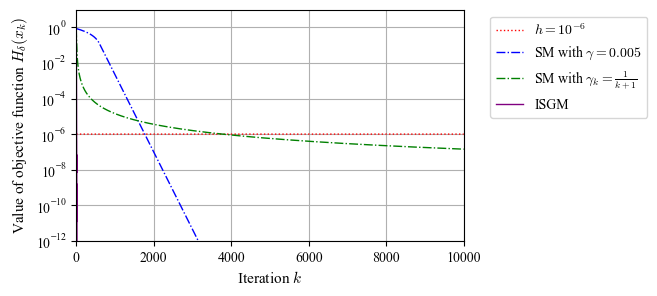

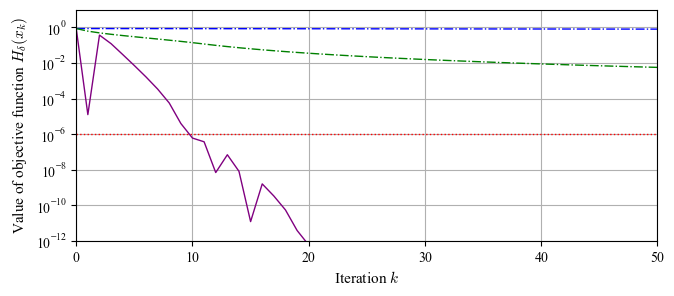

In [11]:
result, x_0, filename1 = VISUALIZATION(objective_function=H, x_start=x_start, x_end=x_end, x_0=-1.995, gamma=gamma, eta=eta, N=10001, h=h, filename='result/third_example', range_of_y=(1e-12, 1e+1), functionname='H_{\delta}')

result_zoomed, x_0, filename2 = VISUALIZATION(objective_function=H, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/third_example_zoomed', range_of_y=(1e-12, 1e+1), legend=False, functionname='H_{\delta}')

image1_path = filename1
image2_path = filename2
output_path = f'result/third_example_combined with initial point {x_0}.png'

combine_images_vertically(image1_path, image2_path, output_path)

In [12]:
average = AVERAGE(objective_function=H, x_start=-2.0, x_end=2.0, gamma=gamma, eta=eta, h=h, N=21, test_points=20)
average

,SM constant,SM diminishing,ISGM
0,0.328709,0.328709,3.287095e-01
1,0.166801,0.166801,4.381467e-01
2,0.167120,0.167120,1.578519e-01
3,0.116845,0.116845,3.045819e-02
4,0.085083,0.085083,8.522354e-03
5,0.063826,0.063826,2.273594e-03
6,0.048163,0.048163,5.338036e-04
7,0.037248,0.037248,1.081576e-04
8,0.029543,0.029543,4.211768e-05
9,0.023772,0.023772,1.447261e-05


In [13]:
# Convert DataFrame to LaTeX format
latex_code = average[:21].to_latex(float_format="{:.12f}".format)
print(latex_code)

\begin{tabular}{lrrr}
\toprule
 & SM constant & SM diminishing & ISGM \\
\midrule
0 & 0.328709461008 & 0.328709461008 & 0.328709461008 \\
1 & 0.166800974413 & 0.166800974413 & 0.438146657345 \\
2 & 0.167119781930 & 0.167119781930 & 0.157851875257 \\
3 & 0.116844645484 & 0.116844645484 & 0.030458187997 \\
4 & 0.085083485195 & 0.085083485195 & 0.008522353763 \\
5 & 0.063825630393 & 0.063825630393 & 0.002273593642 \\
6 & 0.048162631525 & 0.048162631525 & 0.000533803571 \\
7 & 0.037248100745 & 0.037248100745 & 0.000108157593 \\
8 & 0.029543377022 & 0.029543377022 & 0.000042117682 \\
9 & 0.023772360675 & 0.023772360675 & 0.000014472614 \\
10 & 0.019304233008 & 0.019304233008 & 0.000003682734 \\
11 & 0.015953911577 & 0.015953911577 & 0.000000588859 \\
12 & 0.013405717367 & 0.013405717367 & 0.000000101583 \\
13 & 0.011422623082 & 0.011422623082 & 0.000000047139 \\
14 & 0.009849098474 & 0.009849098474 & 0.000000009287 \\
15 & 0.008579659115 & 0.008579659115 & 0.000000002105 \\
16 & 0.007540716

# 4. The fourth example

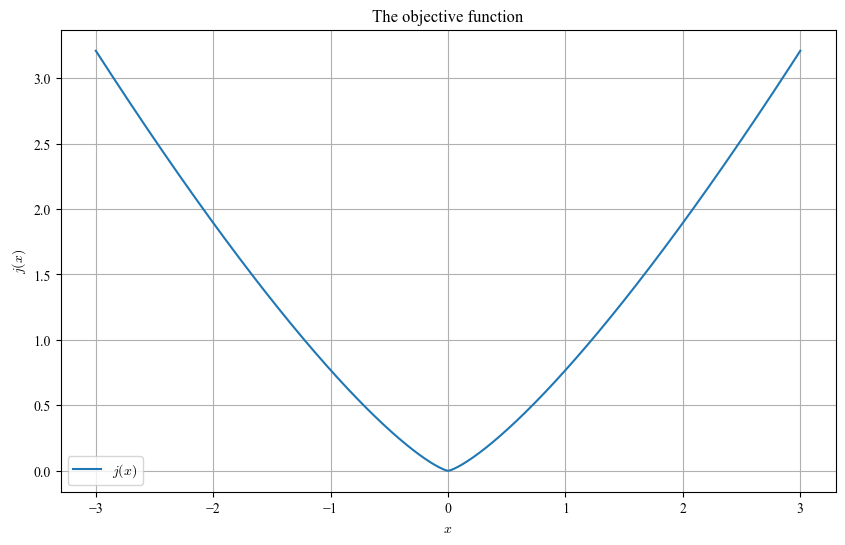

In [14]:
x_start = -3.0
x_end = 3.0
x_0 = 2.995
gamma = 0.005
eta = 1e-6
h = 1e-6
p = 1.3

# Objective Function
def j(x):
    return (np.abs(x)**p)/p

# Generate X values
X = np.linspace(x_start, x_end, 500)

# Generate Y values
Y = np.array([j(i) for i in X])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='$j(x)$')
plt.title('The objective function')
plt.xlabel('$x$')
plt.ylabel('$j(x)$')
plt.legend()
plt.grid(True)
plt.show()

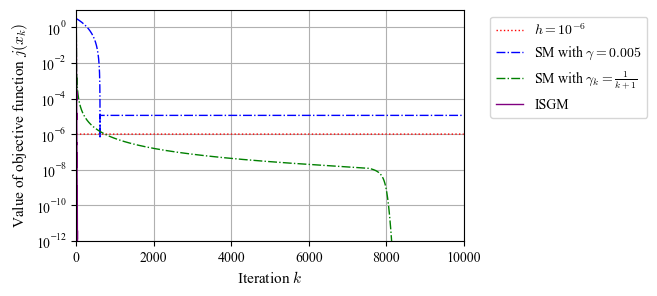

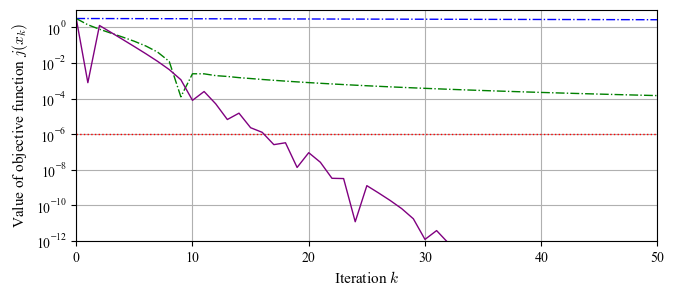

In [15]:
result, x_0, filename1 = VISUALIZATION(objective_function=j, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=10001, h=h, filename='result/fourth_example', range_of_y=(1e-12, 1e+1), functionname='j')

result_zoomed, x_0, filename2 = VISUALIZATION(objective_function=j, x_start=x_start, x_end=x_end, x_0=x_0, gamma=gamma, eta=eta, N=51, h=h, figure_size=(7.5, 3), filename='result/fourth_example_zoomed', range_of_y=(1e-12, 1e+1), legend=False, functionname='j')

image1_path = filename1
image2_path = filename2
output_path = f'result/fourth_example_combined with initial point {x_0}.png'

combine_images_vertically(image1_path, image2_path, output_path)

In [16]:
average = AVERAGE(objective_function=j, x_start=-3.0, x_end=3.0, gamma=gamma, eta=eta, h=h, N=21, test_points=20)
average

,SM constant,SM diminishing,ISGM
0,1.426332,1.426332,1.426332e+00
1,0.439640,0.439640,1.354969e+00
2,0.176033,0.176033,5.124684e-01
3,0.091698,0.091698,2.893755e-01
4,0.050202,0.050202,1.104795e-01
5,0.027737,0.027737,3.890672e-02
6,0.014531,0.014531,1.788790e-02
7,0.007734,0.007734,7.195057e-03
8,0.004275,0.004275,2.089240e-03
9,0.003258,0.003258,9.680904e-04


In [17]:
# Convert DataFrame to LaTeX format
latex_code = average[:21].to_latex(float_format="{:.8f}".format)
print(latex_code)

\begin{tabular}{lrrr}
\toprule
 & SM constant & SM diminishing & ISGM \\
\midrule
0 & 1.42633162 & 1.42633162 & 1.42633162 \\
1 & 0.43964046 & 0.43964046 & 1.35496874 \\
2 & 0.17603334 & 0.17603334 & 0.51246844 \\
3 & 0.09169784 & 0.09169784 & 0.28937555 \\
4 & 0.05020233 & 0.05020233 & 0.11047947 \\
5 & 0.02773687 & 0.02773687 & 0.03890672 \\
6 & 0.01453118 & 0.01453118 & 0.01788790 \\
7 & 0.00773413 & 0.00773413 & 0.00719506 \\
8 & 0.00427518 & 0.00427518 & 0.00208924 \\
9 & 0.00325765 & 0.00325765 & 0.00096809 \\
10 & 0.00277897 & 0.00277897 & 0.00053950 \\
11 & 0.00234522 & 0.00234522 & 0.00021456 \\
12 & 0.00200343 & 0.00200343 & 0.00006584 \\
13 & 0.00173419 & 0.00173419 & 0.00003011 \\
14 & 0.00151607 & 0.00151607 & 0.00001171 \\
15 & 0.00133773 & 0.00133773 & 0.00000422 \\
16 & 0.00118957 & 0.00118957 & 0.00000196 \\
17 & 0.00106527 & 0.00106527 & 0.00000064 \\
18 & 0.00095985 & 0.00095985 & 0.00000042 \\
19 & 0.00086966 & 0.00086966 & 0.00000013 \\
20 & 0.00079186 & 0.00079186